---
title:  "Recommendation Basic02"
excerpt: "Recommendation system using surprise library"

categories:
  - Machine-Learning
tags:
  - ML  
  - surprise  
  - Medium/susanli
  - Recommendation
last_modified_at: 2020-03-08T18:06:00-05:00
---

추천 시스템에서 유명한 library 는 surprise 이다. 워낙 유명하나, 개인적으로 한번 밖에 해본적이 없어서,  
기억이 가물거리는 관계로 남긴다. Basic 01 에 배경설명 등이 있고, 이어지는 post 이다
> 1. CF, latent matrix 를 활용한다.  
> 2. [Medium susanLi](https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b)  
> 3. [SusanLi github](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb)
> 4. [나름 추천 잘하는 사람일것 같은 사람의 github](https://github.com/bigsnarfdude/guide-to-data-mining)

In [1]:
import pandas as pd
import numpy as np

[surprise 공식문서 링크](https://surprise.readthedocs.io/en/stable/)

In [2]:
user = pd.read_csv('D:/★2020_ML_DL_Project/Alchemy/dataset/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID', 'Location', 'Age']
rating = pd.read_csv('D:/★2020_ML_DL_Project/Alchemy/dataset/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']

In [3]:
df = pd.merge(user, rating, on='userID', how='inner') ## inner join 했지만, 딱히 줄어들거나, 변경된것은 없는 듯.
df.drop(['Location', 'Age'], axis=1, inplace=True)

In [4]:
print(df.shape)
df.head(3) ## 별차이 없네..그냥 rating 데이터 하나만 써도 될듯 1149779

(1149779, 3)


userID        ISBN  bookRating
0       2  0195153448           0
1       7   034542252           0
2       8  0002005018           5

__본격 EDA__  
Rating Distribution

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white", context="talk")

In [6]:
data = df['bookRating'].value_counts().sort_index(ascending=False)
print(data)

10     78610
9      67541
8     103736
7      76457
6      36924
5      50974
4       8904
3       5996
2       2759
1       1770
0     716108
Name: bookRating, dtype: int64


In [8]:
(data/data.sum())*100

10     6.836966
9      5.874259
8      9.022256
7      6.649713
6      3.211400
5      4.433374
4      0.774410
3      0.521492
2      0.239959
1      0.153943
0     62.282230
Name: bookRating, dtype: float64

대략 62%에 달하는 user 들이 rating에 0 점을 부여했다. 이 0점은 과연 book 평점을 최악을 준걸까? 아니면, 평점 자체를 달지 않은걸까? 어떻게 봐야하나?

책별로, 평점이 가장 많이 달린걸 보자면...

In [9]:
df.groupby(by=['ISBN'],as_index=False)['bookRating'].count().sort_values('bookRating', ascending=False)[:10]

ISBN  bookRating
247408  0971880107        2502
47371   0316666343        1295
83359   0385504209         883
9637    0060928336         732
41007   0312195516         723
101670  044023722X         647
166705  0679781587         639
28153   0142001740         615
166434  067976402X         614
153620  0671027360         586

유저별로, 어떤 유저가 평점을 가자 많이 달았는지 보자면....

In [10]:
df.groupby(by=['userID'],as_index=False)['bookRating'].count().sort_values('bookRating', ascending=False)[:10]

userID  bookRating
4213     11676       13602
74815   198711        7550
58113   153662        6109
37356    98391        5891
13576    35859        5850
80185   212898        4785
105110  278418        4533
28884    76352        3367
42037   110973        3100
88584   235105        3067

In [11]:
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings  ## 50보다 큰 ISBN 번호들만 남긴다. 
filter_books = filter_books[filter_books].index.tolist() ## 평점 50개 달린,(또는 그이상)되는 책들만, 리스트화 한다.

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))] ## 최소 충족요건을 만족한 data 들만, 추려서 들고온다.
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1149779, 3)
The new data frame shape:	(140516, 3)


In [12]:
df_new.head()

userID        ISBN  bookRating
394     243  0060915544          10
395     243  0060977493           7
397     243  0156006529           0
400     243  0316096199           0
401     243  0316601950           9

__진짜 Surprise library 사용하기__

In [13]:
from surprise import Reader
from surprise import Dataset

We use rmse as our accuracy metric for the predictions.

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html 상세한 설명은 여기에

여기서부터는 surprise의 여러 알고리즘이 등장하는데, Susan Li 의 설명을 보고도 몰라서, 그냥 내가 하나하나 정리하면서, 올린다.

# Basic algorithms

**NormalPredictor**
- NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.  

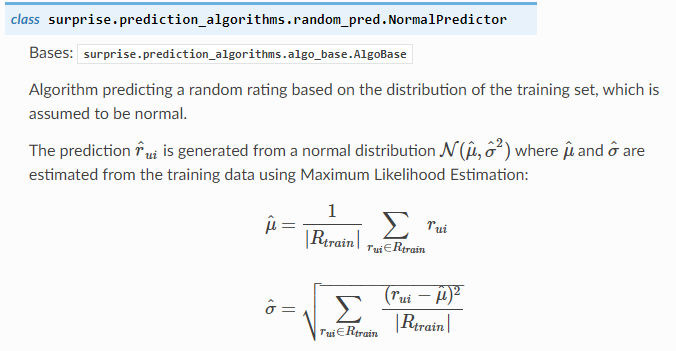

Basic01 post 에 남겼다.

**BaselineOnly**
- BasiclineOnly algorithm predicts the baseline estimate for given user and item.
- Baselines estimates configuration

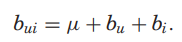

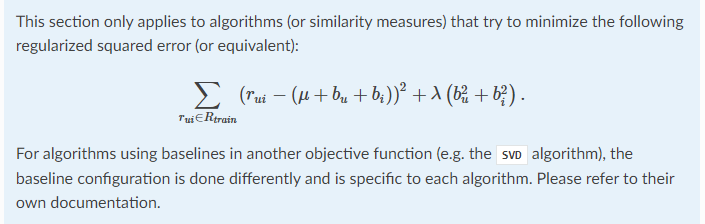

제일 위의 식이 Baselines 의 내용인데, bui = rui 즉 어떤 rating을 추정하는 텀. 맨 위가 Baseline 의 기본개념이다.  
뮤 는 전체 rating의 평균이고, bu 은 user의 bias, bi 는 item 의 bias이다. 이때, 핵심이 되는 bu, bi 를 구하는 Minimzie object 식이 밑에 그림이다.  
**Minimzie object 이 식의 찾는 과정에 fit(train) 과정이라 보면되는데 2가지 방식 'ALS' 랑 'SGD'방식이 있다.**

Basic01 post 에 남겼다.

# Basic 02 시작!!!!

# k-NN algorithms
**KNNBasic**  
- KNNBasic is a basic collaborative filtering algorithm.  

**KNNWithMeans**  
- KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.  

**KNNWithZScore**  
- KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.  

**KNNBaseline**  
- KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

# Matrix Factorization-based algorithms
**SVD**
- SVD algorithm is equivalent to Probabilistic Matrix Factorization (http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf)  

**SVDpp**  
- The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.  

**NMF**  
- NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

# Slope One  
- Slope One is a straightforward implementation of the SlopeOne algorithm. (https://arxiv.org/abs/cs/0702144)

# Co-clustering
- Co-clustering is a collaborative filtering algorithm based on co-clustering (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.113.6458&rep=rep1&type=pdf) We use rmse as our accuracy metric for the predictions.

In [ ]:
## 모든 객체와 라이브러니는 surprise package 안에 있는 것을 사용한다.
benchmark = [] ## 무사통과 알고리즘 : 
# Iterate over all algorithms  ## 에러나는 알고리즘 NMF(),
%time
for algorithm in [ SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    print(algorithm)
    results = cross_validate(algorithm, s_data, measures=['RMSE'], cv=3, verbose=False)     ## RMSE : 평균제곱근편차

In [ ]:
# Get results & append algorithm name
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
benchmark.append(tmp)

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results